# Ensemble Techniques And Its Types-4

**Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.**

**Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.**  disease risk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1. The data does not have any missing values.
2. It does not have any categorical features except the target feature which is also encoded already.
3. Since we are going to apply Random Forest Classifier we don't need to standardize,but we will in the next step after spliting the data
4. The data is slightly imbalanced as it has more "1" (has disease) instances more than "0" (does not have disease)

**Q2. Split the dataset into a training set (70%) and a test set (30%).**

In [8]:
X = df.drop("target",axis=1)
y = df["target"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
##Scaling the independent features
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (212, 13), (212,)
Test set shape: (91, 13), (91,)


**Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.**

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(n_estimators=100,max_depth=10)

In [16]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

**Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.**

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [19]:
acc_score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [20]:
print(f"Accuracy: {acc_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.81
Precision: 0.82
Recall: 0.84
F1 Score: 0.83


**Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.**

In [21]:
importances = clf.feature_importances_

In [22]:
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


In [23]:
feature_importances_df

,Feature,Importance
0,age,0.083405
1,sex,0.031800
2,cp,0.121250
3,trestbps,0.080098
4,chol,0.066877
5,fbs,0.012285
6,restecg,0.019359
7,thalach,0.113837
8,exang,0.053820
9,oldpeak,0.115808


In [24]:
## Soritng the dataframe by feature importances
feature_importances_df = feature_importances_df.sort_values(by= "Importance",ascending=False)

In [25]:
feature_importances_df

,Feature,Importance
11,ca,0.139596
2,cp,0.121250
9,oldpeak,0.115808
12,thal,0.114619
7,thalach,0.113837
0,age,0.083405
3,trestbps,0.080098
4,chol,0.066877
8,exang,0.053820
10,slope,0.047247


In [26]:
#Top 5 features 
top_5_features = feature_importances_df.head(5)

In [27]:
top_5_features

,Feature,Importance
11,ca,0.139596
2,cp,0.121250
9,oldpeak,0.115808
12,thal,0.114619
7,thalach,0.113837


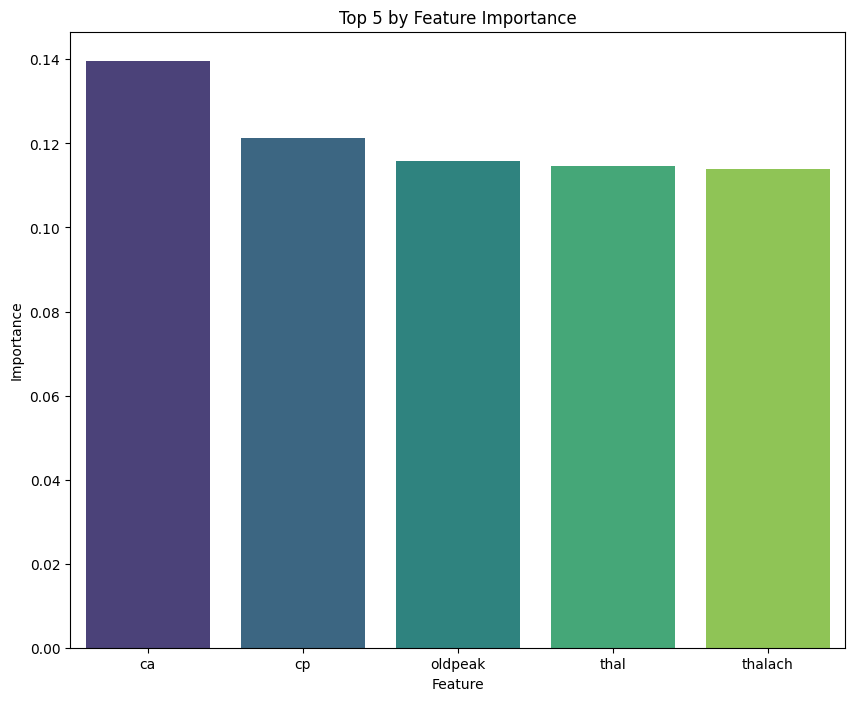

In [28]:
#plotting feature importance bar chart
plt.figure(figsize=(10,8))
sns.barplot(x='Feature',y='Importance',data= top_5_features,palette='viridis')
plt.title("Top 5 by Feature Importance")
plt.show()

**Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
rf_clf = RandomForestClassifier()

In [41]:
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'max_depth': [5,10, 15,20],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

In [42]:
grid_clf = GridSearchCV(rf_clf,param_grid=param_grid,cv = 5,scoring='accuracy')

In [43]:
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

**Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.**

In [44]:
## best hyperparameters:

grid_clf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [45]:
grid_clf.best_score_

0.8486157253599114

In [46]:
best_clf = grid_clf.best_estimator_

In [47]:
y_pred = best_clf.predict(X_test)

In [48]:
acc_score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {acc_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.83
Recall: 0.86
F1 Score: 0.84


In [50]:
X_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

**The model with hyperparameter tuning outperforms the one with no hyperparameter tuning, maybe experimenting more with hyperparameters may result in more better results.**

**Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.**

In [55]:
importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
top_features_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(2)
# Extract the names of the top 2 features
top_features = top_features_df['Feature'].values
print(f"Top 2 Features: {top_features}")


Top 2 Features: ['ca' 'cp']


In [56]:
# Use only the top 2 features for modeling
X_train_top_features = X_train[:, np.isin(X.columns, top_features)]
X_test_top_features = X_test[:, np.isin(X.columns, top_features)]

In [58]:
# Train a new Random Forest model with only the top 2 features
rf_clf_top_features = RandomForestClassifier(n_estimators=100, max_depth=20,min_samples_leaf=4,min_samples_split=5 ,random_state=42)
rf_clf_top_features.fit(X_train_top_features, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

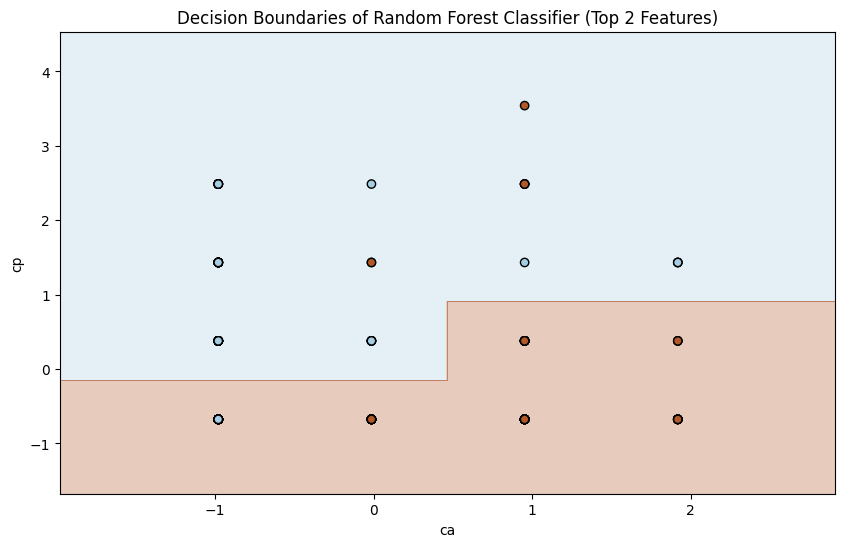

In [59]:
# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, feature_names):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired, marker='o')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision Boundaries of Random Forest Classifier (Top 2 Features)')
    plt.show()

# Plot decision boundaries for the top 2 features
plot_decision_boundaries(X_train_top_features, y_train, rf_clf_top_features, top_features)


**Insights:**  
**While the model works well but since it is a medical problem where it is important to classify a patient with heart disease perfectly,it is matter of life or death if predicted wrong in this case. The model has recall of 86% which can be improved upon.**  
**This might be due to imbalance in the data which can be resolved by resampling techinques like SMOTE**  